# PP5 - ML Brain Tumor Detector

## Notebook 2 - Data Visualization

### Objectives

* Fetch data from kaggle and prepare data for further processes.


### Inputs

| **input**      |          |       |
|-----------------|----------|-------|
| **train/**      | no_tumor | tumor |
| **test/**       | no_tumor | tumor |
| **validation/** | no_tumor | tumor |


### Outputs




### Additional Comments

* Dataset: [Kaggle](https://www.kaggle.com/datasets/sartajbhuvaji/brain-tumor-classification-mri?select=Training)
* License: [MIT](https://www.mit.edu/~amini/LICENSE.md)

---

## Set Data Directory

### Import Libraries

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
sns.set_style("white")
from matplotlib.image import imread

### Set Working Directory

In [2]:
cwd= os.getcwd()

In [3]:
current_dir = os.getcwd()
current_dir

'c:\\Users\\tobis\\Documents\\GitHub\\ml-brain-tumor-detection\\jupyter_notebooks'

In [4]:
os.chdir(os.path.dirname(current_dir))
print("New directory set!")

New directory set!


In [5]:
working_dir = os.getcwd()
working_dir

'c:\\Users\\tobis\\Documents\\GitHub\\ml-brain-tumor-detection'

### Set Input Directory

In [6]:
data_dir= 'input/brain-mri-scans'
train_path = data_dir + '/train'
val_path = data_dir + '/validation'
test_path = data_dir + '/test'
print(f"Train Set Path: {train_path}")
print(f"Validation Set Path: {val_path}")
print(f"Test Set Path: {test_path}")


Train Set Path: input/brain-mri-scans/train
Validation Set Path: input/brain-mri-scans/validation
Test Set Path: input/brain-mri-scans/test


### Set Output Directory

In [7]:
version = 'v1'
file_path = f'outputs/{version}'

if 'outputs' in os.listdir(working_dir) and version in os.listdir(working_dir + '/outputs'):
    print('Old version is already available create a new version.')
    pass
else:
    os.makedirs(name=file_path)

print(file_path)

Old version is already available create a new version.
outputs/v1


### Set Label Names

In [8]:
labels = os.listdir(train_path)
print('Label for the images are', labels)

Label for the images are ['no_tumor', 'tumor']


---

## Data visualisation of image data

### Image Shape

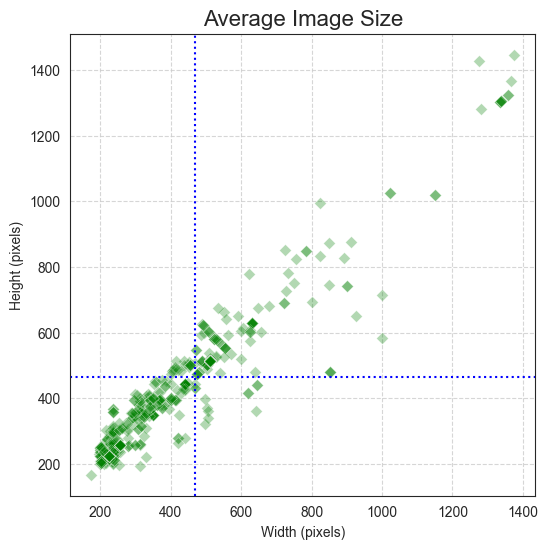

Image Width average: 466 
Image Height average: 468


In [9]:
img_height, img_width = [], []
for label in labels:
    for img_file in os.listdir(train_path + '/' + label):
        img = imread(train_path + '/' + label + '/' + img_file)
        d1, d2, colors = img.shape
        img_height.append(d1)
        img_width.append(d2)

sns.set_style("white")
fig, axes = plt.subplots(figsize=(6, 6))
sns.scatterplot(x=img_width, y=img_height, alpha=0.3, color='green', marker='D')
axes.set_xlabel("Width (pixels)", fontsize=10)
axes.set_ylabel("Height (pixels)", fontsize=10)
img_height_mean = int(np.array(img_height).mean())
img_width_mean = int(np.array(img_width).mean())
axes.axvline(x=img_height_mean, color='blue', linestyle=':')
axes.axhline(y=img_width_mean, color='blue', linestyle=':')
plt.title("Average Image Size", fontsize=16)
plt.grid(True, linestyle='--', alpha=0.8)
plt.show()
print(f"Image Width average: {img_width_mean} \nImage Height average: {img_height_mean}")

Image size for training the model

In [10]:
image_shape = (img_height_mean, img_width_mean, 3)
image_shape

(468, 466, 3)

Save the image shape embeddings

In [11]:
joblib.dump(value=image_shape ,
            filename=f"{file_path}/avg_image_shape_train.pkl")

['outputs/v1/avg_image_shape_train.pkl']

---

## Average and Variability of Images per Label

**Function to load images in an array**

In [12]:
from tensorflow.keras.preprocessing import image

In [13]:
def load_image_as_array(dataset_dir, new_size=(100, 100), n_images_per_label=20):
    '''
    Description:
    Loads images from a directory in an array

    Parameters:
    data_dir - str:            Directory path of images
    new_size - tuple:            resizes the images
    n_images_per_label - int:  number of images to be loaded per label

    Returns:
    x as numpy array: array containing the resized images
    y as numpy array: array containing the labels of the images

    '''

    X, y = np.array([], dtype='int'), np.array([], dtype='object')
    labels = os.listdir(dataset_dir)

    for label in labels:
        counter = 0
        for image_filename in os.listdir(dataset_dir + '/' + label):
            if counter < n_images_per_label:

                img = image.load_img(
                    dataset_dir + '/' + label + '/' + image_filename, target_size=new_size)
                if image.img_to_array(img).max() > 1:
                    img_resized = image.img_to_array(img) / 255
                else:
                    img_resized = image.img_to_array(img)

                X = np.append(X, img_resized).reshape(-1,
                                                      new_size[0], new_size[1], img_resized.shape[2])
                y = np.append(y, label)
                counter += 1

    return X, y

In [14]:
X, y = load_image_as_array(dataset_dir=train_path,
                           new_size=image_shape,
                           n_images_per_label=30)
print(X.shape, y.shape)

(60, 468, 466, 3) (60,)


In [15]:
def plot_avg_variability_per_labels(X, y, figsize=(10, 5), save_image=False):
    '''
    Description:
    Plots average and variability of images for no_tumor and tumor (labels)

    Parameters:
    X - numpy array:    Input images
    y - numpy array:    Labels of images
    figsize - tuple:    Size of the figure
    save_image - bool:  Optional to save the image, default is false

    Returns:
    None

    '''

    for label_to_display in np.unique(y):
        sns.set_style("white")

        y = y.reshape(-1, 1, 1)
        boolean_mask = np.any(y == label_to_display, axis=1).reshape(-1)
        arr = X[boolean_mask]

        avg_img = np.mean(arr, axis=0)
        std_img = np.std(arr, axis=0)
        print(f"==== Label {label_to_display} ====")
        print(f"Image Shape: {avg_img.shape}")
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=figsize)
        axes[0].set_title(f'Average image for {label_to_display} label')
        axes[0].imshow(avg_img, cmap='gray')
        axes[1].set_title(f'Variability image for {label_to_display} label')
        axes[1].imshow(std_img, cmap='gray')

        if save_image:
            plt.savefig(f'{file_path}/avg_var_{label_to_display}.png',
                        bbox_inches='tight', dpi=150)
        else:
            plt.tight_layout()
            plt.show()
            print("\n")

==== Label no_tumor ====
Image Shape: (468, 466, 3)
==== Label tumor ====
Image Shape: (468, 466, 3)


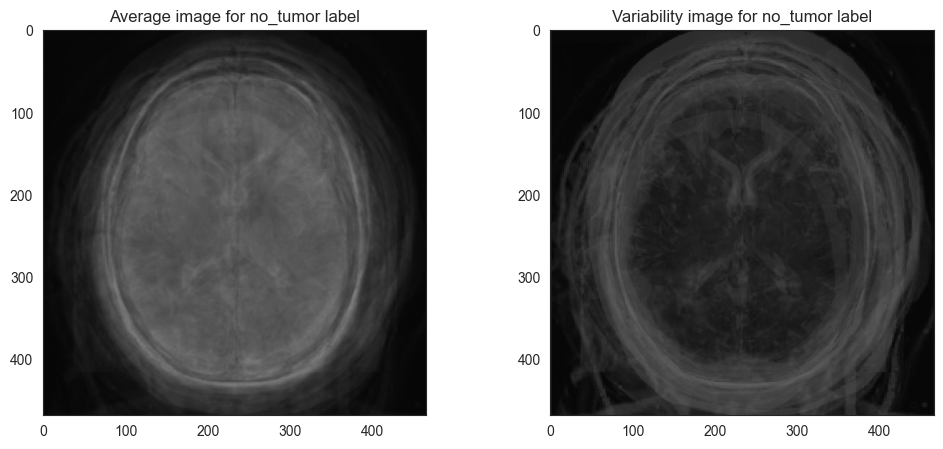

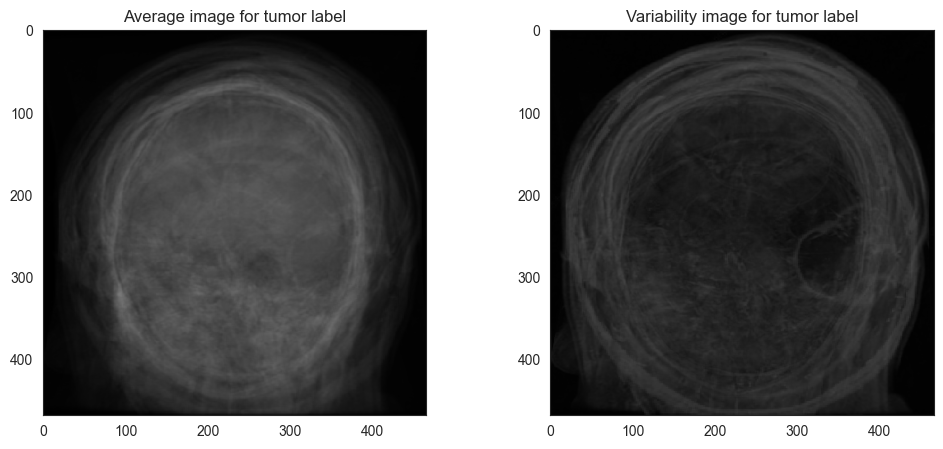

In [16]:
plot_avg_variability_per_labels(X=X, y=y, figsize=(12, 5), save_image=True)

---

## Difference between average healthy brain MRI scan and one with tumor

In [17]:
def subset_image_label(X, y, label_to_display):
    '''
    Description:
    Subsets input images based on the specified label

    Parameters:
    X - numpy array:            Input images
    y - numpy array:            Labels of the images
    label_to_display - int:     Label to subset the data for

    Returns:
    numpy array:                Subset of input images corresponding to the specified label
    '''
    y = y.reshape(-1, 1, 1)
    boolean_mask = np.any(y == label_to_display, axis=1).reshape(-1)
    df = X[boolean_mask]
    return df


def diff_bet_avg_image_labels_data_as_array(X, y, label_1, label_2,
                                            figsize=(20, 5),
                                            save_image=False):
    '''
    Description:
    Calculates the average and difference between two sets of MRI scans based on their labels
    Plots three images:
    Plot 1: The average MRI scan for label_1 (tumor)
    Plot 2: The average MRI scan for label_2 (no_tumor)
    Plot 3: The difference between the average MRI scans for label_1 and label_2.

    Parameters:
    X - numpy array:            Input images
    y - numpy array:            Labels of the images.
    label_1 - int:              Label for MRI scans (tumor).
    label_2 - int:              Label for MRI scans (no_tumor).
    figsize - tuple:            Size of the figure (default is (20, 5)).
    save_image - bool:          Whether to save the generated image (default is False).

    Returns:
    None
    '''

    sns.set_style("white")

    if (label_1 not in np.unique(y)) or (label_2 not in np.unique(y)):
        print(
            f'Either label {label} or label {label_2}, are not in '
            f'{np.unique(y)} ')
        return

    images_label = subset_image_label(X, y, label_1)
    label1_avg = np.mean(images_label, axis=0)

    images_label = subset_image_label(X, y, label_2)
    label2_avg = np.mean(images_label, axis=0)

    difference_mean = label1_avg - label2_avg
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=figsize)
    axes[0].imshow(label1_avg, cmap='gray')
    axes[0].set_title(f'Average {label_1} MRI scan')
    axes[1].imshow(label2_avg, cmap='gray')
    axes[1].set_title(f'Average {label_2} MRI scan')
    axes[2].imshow(difference_mean, cmap='gray')
    axes[2].set_title(f'Difference image: Avg {label_1} & {label_2} MRI scan')
    if save_image:
        plt.savefig(f"{file_path}/avg_diff.png", bbox_inches='tight', dpi=150)
    else:
        plt.tight_layout()
        plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


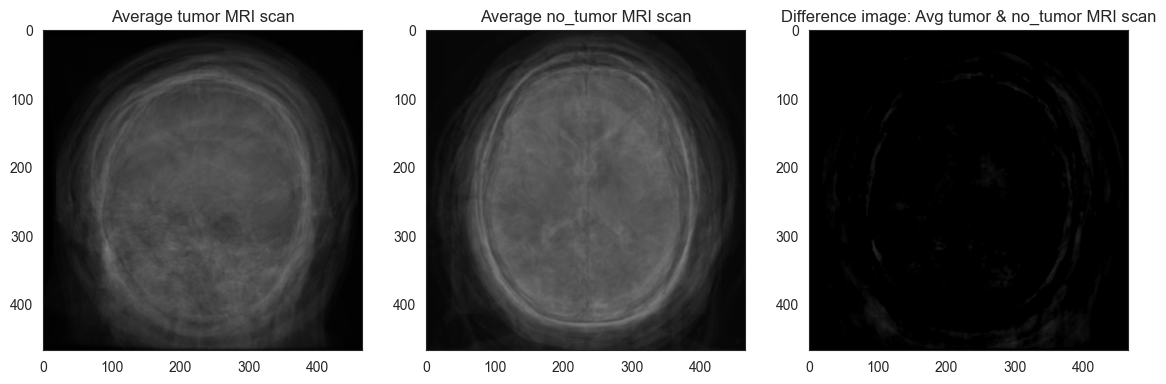

In [18]:
diff_bet_avg_image_labels_data_as_array(X=X, y=y,
                                        label_1='tumor',
                                        label_2='no_tumor',
                                        figsize=(14, 14),
                                        save_image=True
                                        )

---

## Image Montage

In [19]:
import itertools
import random

In [22]:
def image_montage(dir_path, label_to_display, nrows, ncols, figsize=(15, 10)):
    """
    Description:
    Displays a montage of images for a given label

    Parameters:
    dir_path - str:             Path to the directory containing the images
    label_to_display - str:     Label of the images to display
    nrows - int:                Number of rows in the montage grid
    ncols - int:                Number of columns in the montage grid
    figsize - tuple:            Size of the figure (default is (15, 10))

    Returns:
    None

    Raises:
    FileNotFoundError:          If the specified label doesn't exist in the directory
    """

    labels = os.listdir(dir_path)

    if label_to_display in labels:

        images_list = os.listdir(dir_path + '/' + label_to_display)
        if nrows * ncols < len(images_list):
            img_idx = random.sample(images_list, nrows * ncols)
        else:
            print(
                f"Decrease nrows or ncols to create your montage. \n"
                f"There are {len(images_list)} in your subset. "
                f"You requested a montage with {nrows * ncols} spaces")
            return

        list_rows = range(0, nrows)
        list_cols = range(0, ncols)
        plot_idx = list(itertools.product(list_rows, list_cols))

        fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)
        for x in range(0, nrows*ncols):
            img = imread(dir_path + '/' + label_to_display + '/' + img_idx[x])
            img_shape = img.shape
            axes[plot_idx[x][0], plot_idx[x][1]].imshow(img)
            axes[plot_idx[x][0], plot_idx[x][1]].set_title(
                f"Width {img_shape[1]}px x Height {img_shape[0]}px")
            axes[plot_idx[x][0], plot_idx[x][1]].set_xticks([])
            axes[plot_idx[x][0], plot_idx[x][1]].set_yticks([])
        plt.tight_layout()
        plt.show()

    else:
        print("The label you selected doesn't exist.")
        print(f"The existing options are: {labels}")

no_tumor


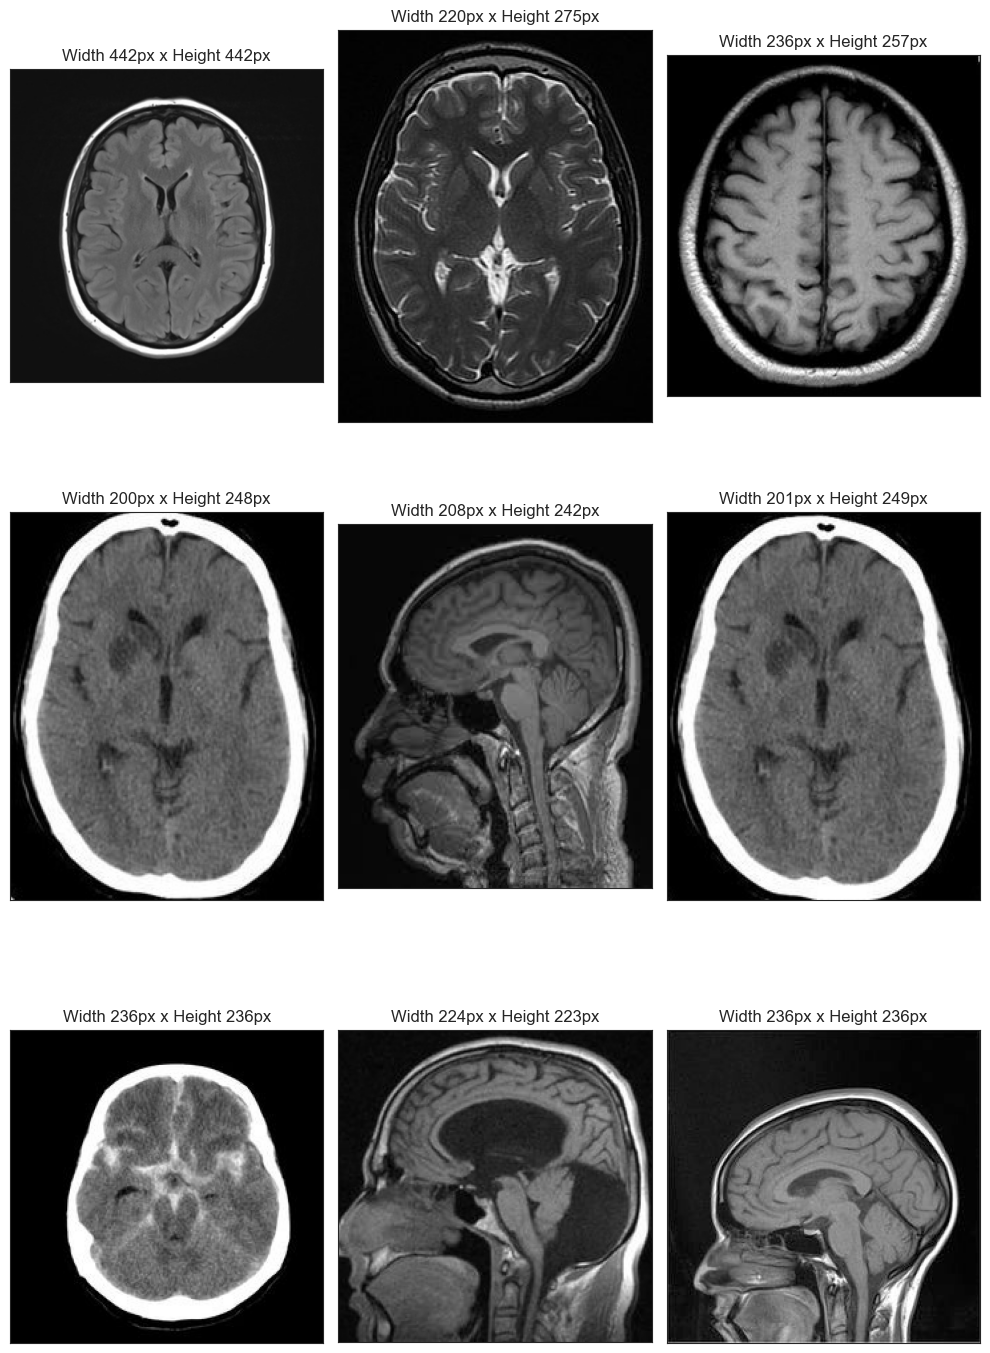



tumor


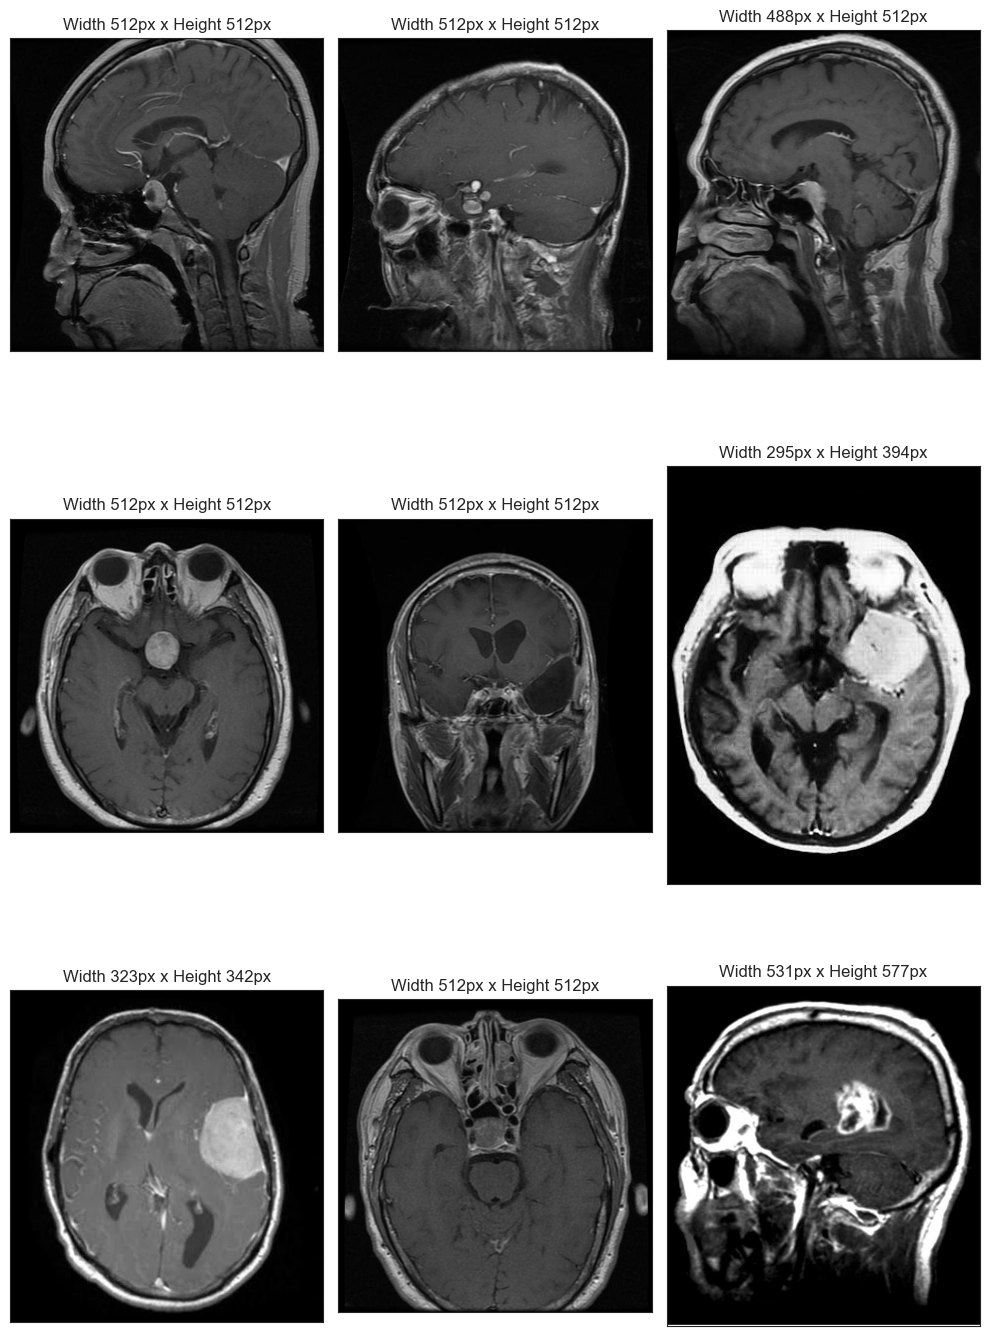

In [24]:
for label in labels:
    print(label)
    image_montage(dir_path=train_path,
                  label_to_display=label,
                  nrows=3, ncols=3,
                  figsize=(10, 15)
                  )
    print("\n")